<a href="https://colab.research.google.com/gist/Nafeesa-21/4d97790ffaea4c739179af14e39e60cc/stock-market-prediction-lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import libraries and Explore Dataset



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
plt.style.use('fivethirtyeight')

In [5]:
from google.colab import files
files.upload()

Saving stockpricex.csv to stockpricex (1).csv


{'stockpricex.csv': b'Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)\r\n2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914,7162.35\r\n2018-09-27,234.55,236.8,231.1,233.8,233.25,5082859,11859.95\r\n2018-09-26,240,240,232.5,235,234.25,2240909,5248.6\r\n2018-09-25,233.3,236.75,232,236.25,236.1,2349368,5503.9\r\n2018-09-24,233.55,239.2,230.75,234,233.3,3423509,7999.55\r\n2018-09-21,235,237,227.95,233.75,234.6,5395319,12589.59\r\n2018-09-19,235.95,237.2,233.45,234.6,234.9,1362058,3202.78\r\n2018-09-18,237.9,239.25,233.5,235.5,235.05,2614794,6163.7\r\n2018-09-17,233.15,238,230.25,236.4,236.6,3170894,7445.41\r\n2018-09-14,223.45,236.7,223.3,234,233.95,6377909,14784.5\r\n2018-09-12,216.35,223.7,212.65,221.65,222.65,4570939,10002.01\r\n2018-09-11,222.5,225.4,214.85,216.35,216,3508990,7735.81\r\n2018-09-10,222.5,235.15,220.65,221.05,222,7514106,17130.29\r\n2018-09-07,221,224.5,219.1,223.15,222.95,1232507,2742.84\r\n2018-09-06,224,225,218.2,220.95,221.05,1738824,3856.72\r\n20

In [6]:
df = pd.read_csv("stockpricex.csv")

In [7]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


import plotly.graph_objects as go
import pandas as pd



fig = go.Figure(data=go.Ohlc(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close']))

fig.update_layout(
    title='Stock Prediction',
    yaxis_title='Market',
    shapes = [dict(
        x0='2016-12-09', x1='2016-12-09', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2016-12-09', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')]
)

fig.show()

In [10]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [11]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

##Data Visualization


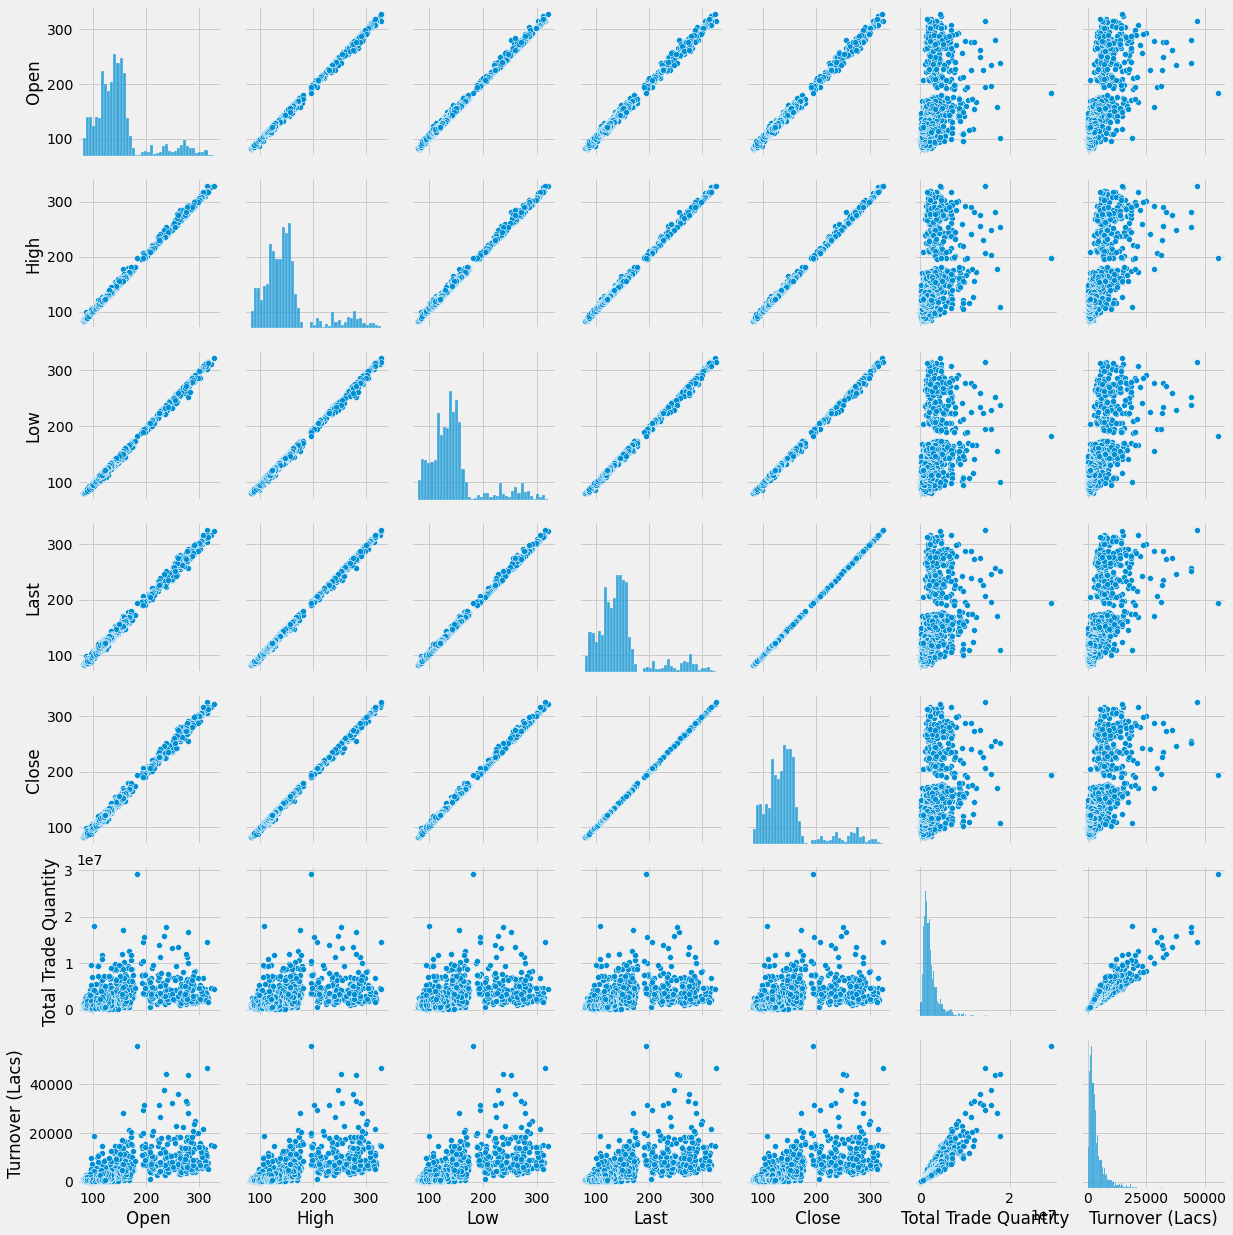

In [12]:
sns.pairplot(df)

Text(0.5, 1.0, 'distribution of target column')

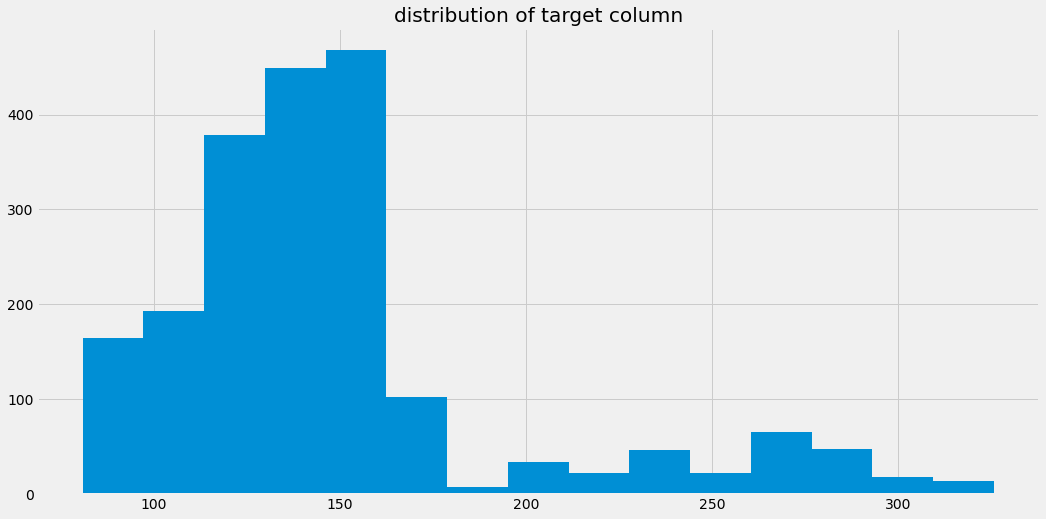

In [13]:
##Disturbution of taget col
plt.figure(figsize=(16,8))
plt.hist(df['Close'],bins=15)
plt.title('distribution of target column')

Text(0, 0.5, 'closing')

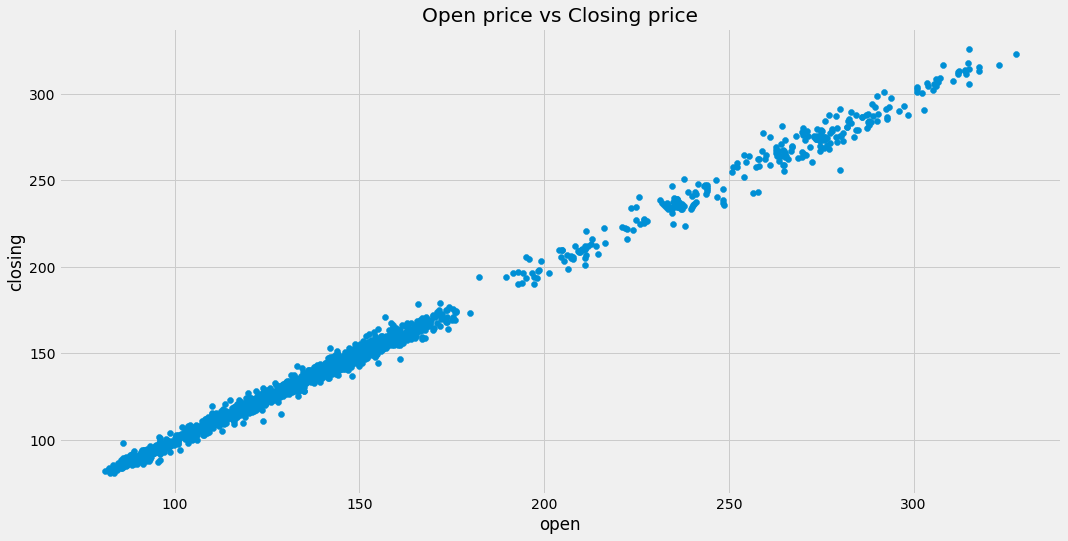

In [14]:
##Open vs Closing prices
plt.figure(figsize=(16,8))
plt.scatter(df['Open'],df['Close'])
plt.title('Open price vs Closing price')
plt.xlabel('open')
plt.ylabel('closing')


Text(0, 0.5, 'closing')

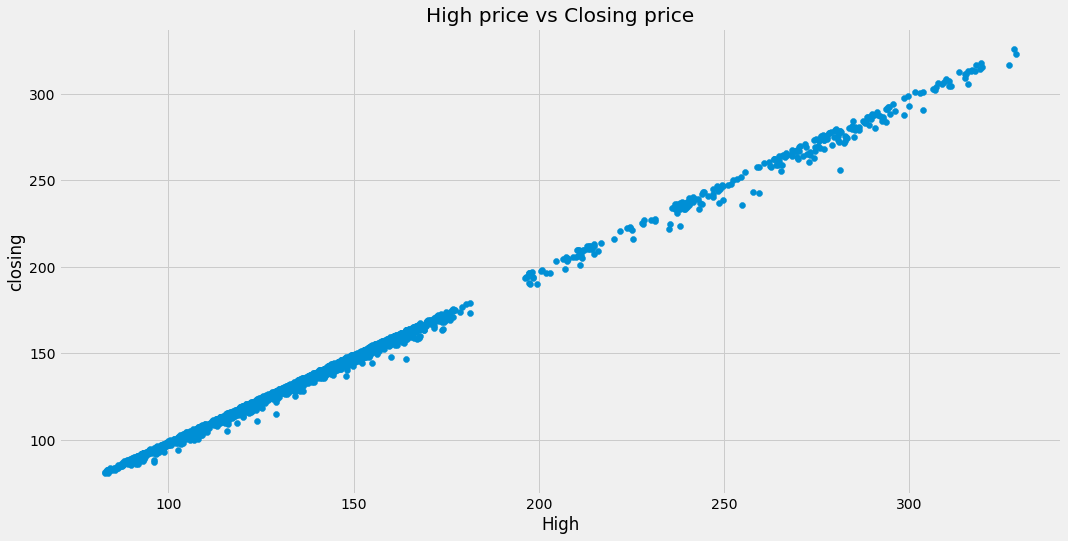

In [15]:
##High vs closing prices
plt.figure(figsize=(16,8))
plt.scatter(df['High'],df['Close'])
plt.title('High price vs Closing price')
plt.xlabel('High')
plt.ylabel('closing')


Text(0, 0.5, 'Low')

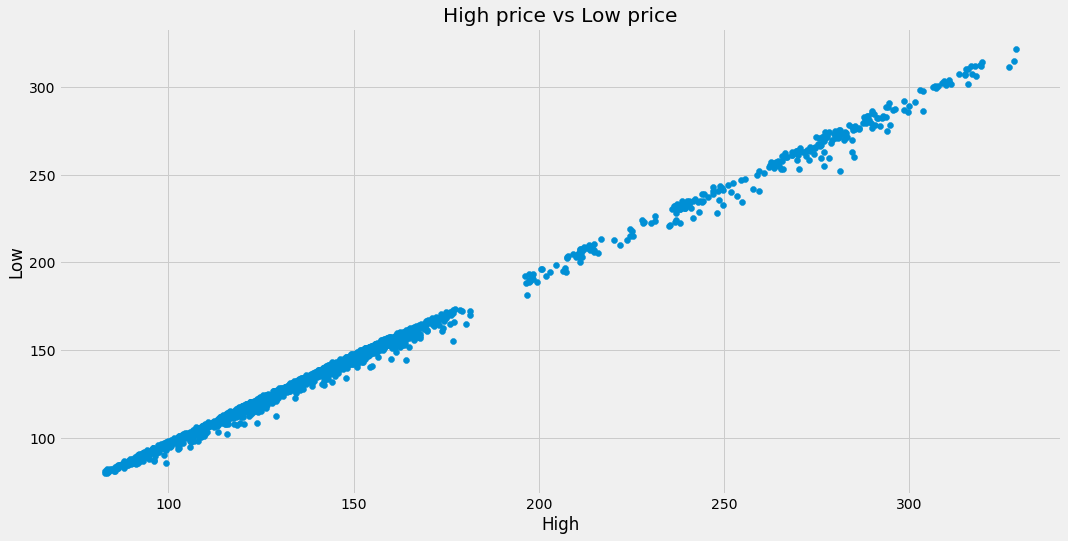

In [16]:
##High vs Low prices
plt.figure(figsize=(16,8))
plt.scatter(df['High'],df['Low'])
plt.title('High price vs Low price')
plt.xlabel('High')
plt.ylabel('Low')


Text(0, 0.5, 'closing price')

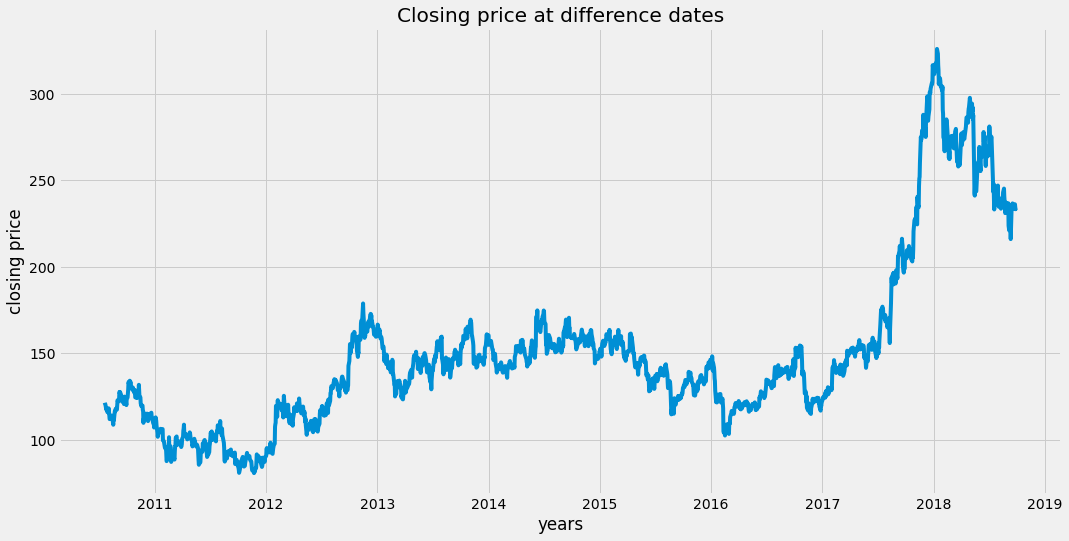

In [17]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close'])
plt.title('Closing price at difference dates')
plt.xlabel('years')
plt.ylabel('closing price')

Text(0, 0.5, 'Open price')

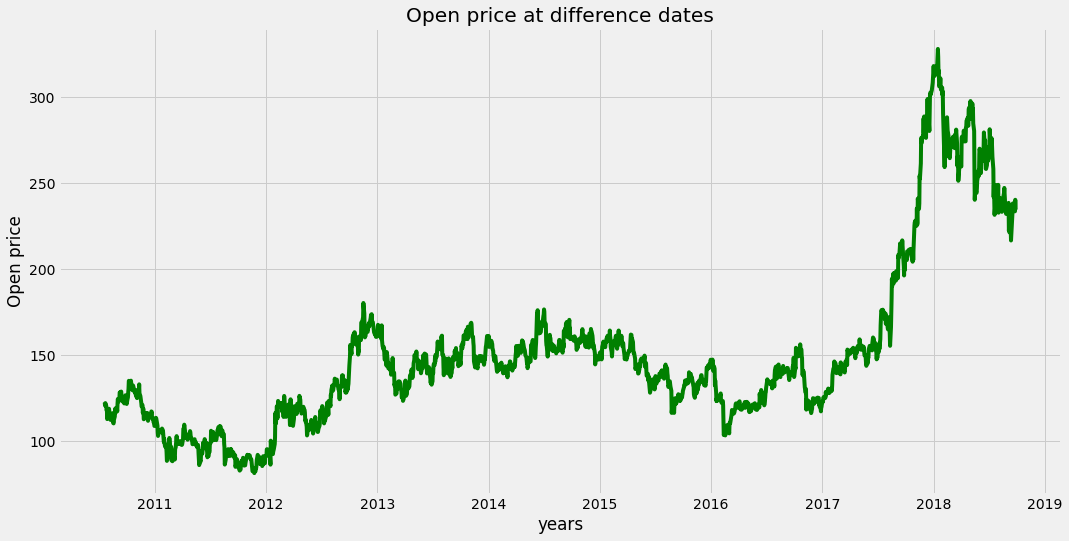

In [18]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Open'],color='g')
plt.title('Open price at difference dates')
plt.xlabel('years')
plt.ylabel('Open price')

Text(0, 0.5, 'closing price')

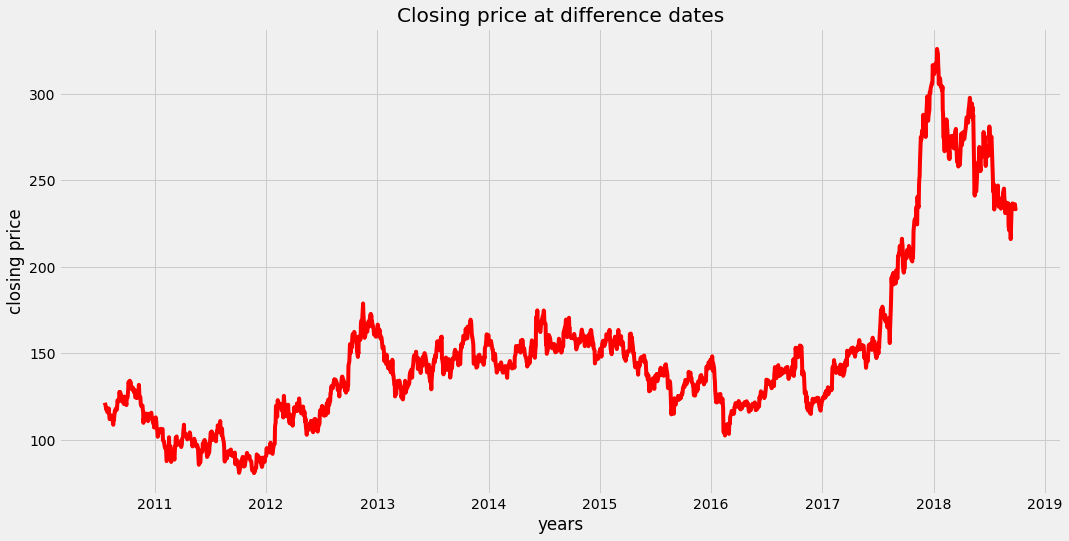

In [19]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close'],color='r')
plt.title('Closing price at difference dates')
plt.xlabel('years')
plt.ylabel('closing price')

Text(0, 0.5, 'High price')

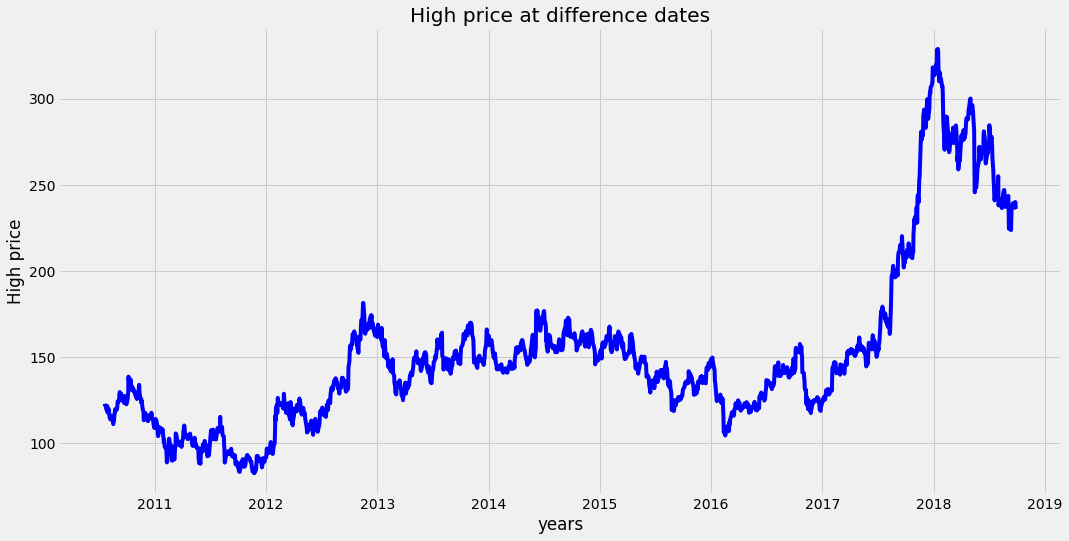

In [20]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['High'],color='b')
plt.title('High price at difference dates')
plt.xlabel('years')
plt.ylabel('High price')

Text(0, 0.5, 'Low price')

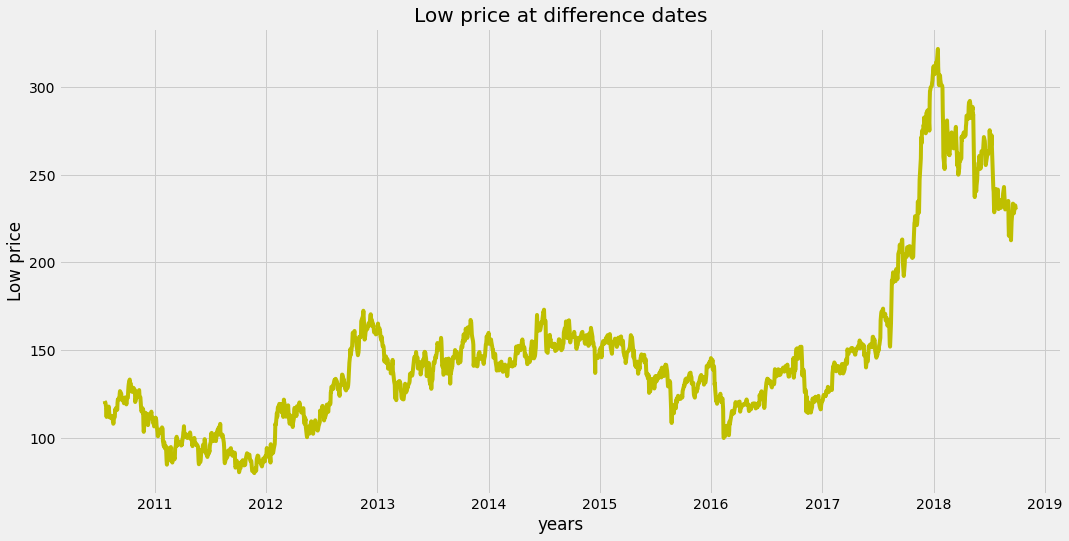

In [21]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Low'],color='y')
plt.title('Low price at difference dates')
plt.xlabel('years')
plt.ylabel('Low price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


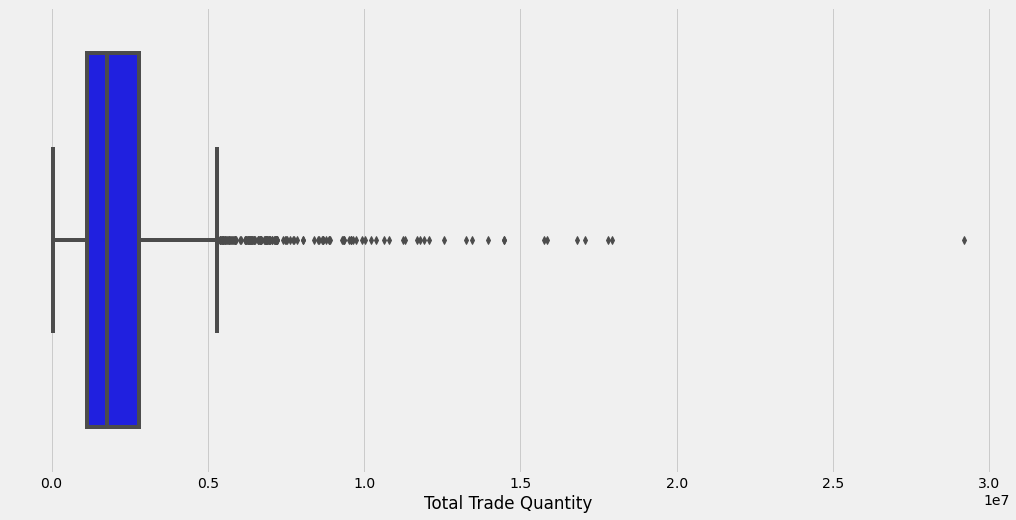

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(df['Total Trade Quantity'],color='b')

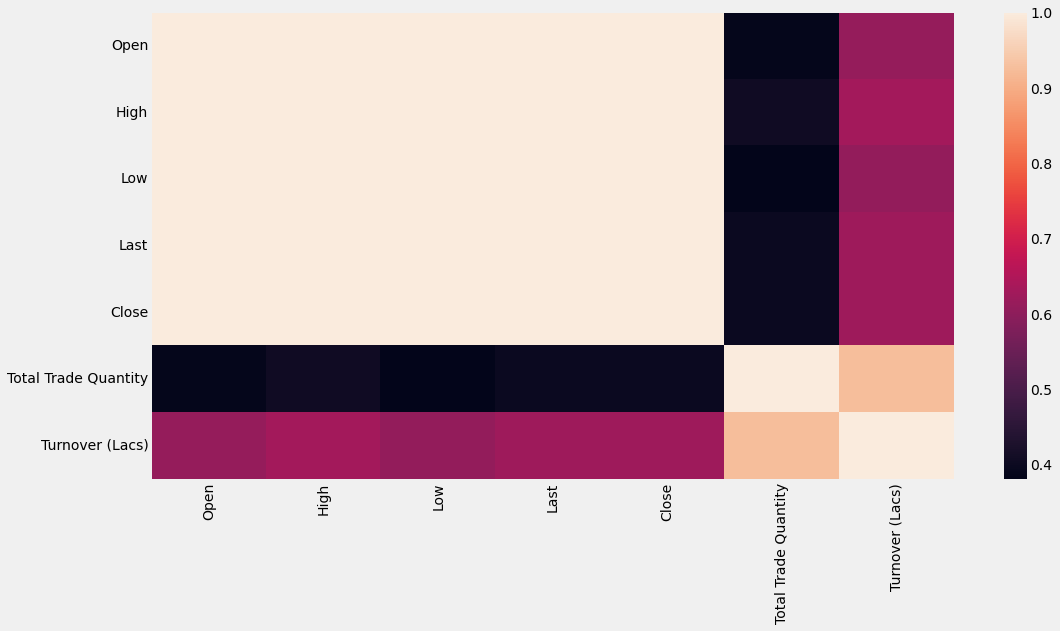

In [23]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr())

##Feature Engineering

In [25]:
training_set =df.iloc[:, 1:2].values

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [27]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [35]:
X=df.drop(['Close','Date'],axis=1)
Y=df['Close']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

##Building LSTM

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [29]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 15s 124ms/step - loss: 0.0105
Epoch 2/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0029
Epoch 4/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0023
Epoch 6/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0022
Epoch 8/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0019
Epoch 10/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0021
Epoch 11/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0019
Epoch 13/100

In [30]:
df2=df.copy()

In [40]:
df2.drop(['Close','Date'], axis=1)

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
0,234.05,235.95,230.20,233.50,3069914,7162.35
1,234.55,236.80,231.10,233.80,5082859,11859.95
2,240.00,240.00,232.50,235.00,2240909,5248.60
3,233.30,236.75,232.00,236.25,2349368,5503.90
4,233.55,239.20,230.75,234.00,3423509,7999.55
...,...,...,...,...,...,...
2030,117.60,119.50,112.00,118.80,586100,694.98
2031,120.10,121.00,117.10,117.10,658440,780.01
2032,121.80,121.95,120.25,120.35,281312,340.31
2033,120.30,122.00,120.25,120.75,293312,355.17


In [41]:
real_stock_price = df2.iloc[:, 1:2].values

In [42]:
real_stock_price

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [44]:
dataset_total = pd.concat((df['Open'], df2['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df2) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

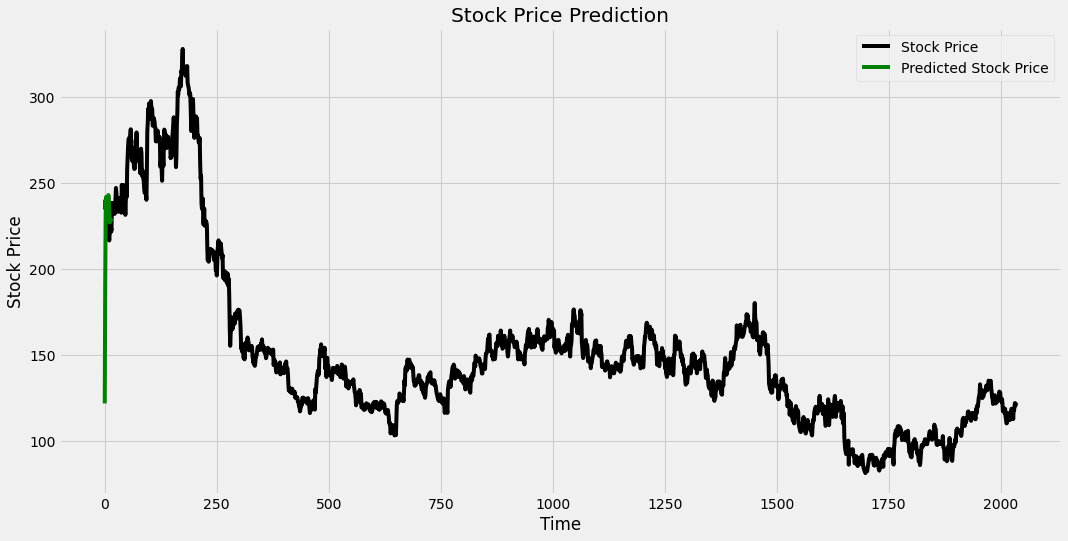

In [48]:
plt.figure(figsize=(16,8))
plt.plot(real_stock_price, color = 'black', label ='Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()